## Import Libraries

In [1]:
# Numerical operations
import numpy as np

# Data handling / paths
import os
import shutil
from glob import glob

# Visualization
import matplotlib.pyplot as plt
import cv2  # optional, for advanced image manipulation

# Deep learning / YOLOv8
from ultralytics import YOLO

# Optional: For progress bars in loops
from tqdm import tqdm

# Optional: For Jupyter notebooks
%matplotlib inline
import os
from glob import glob
from warnings import filterwarnings
filterwarnings("ignore")

## Load Dataset

In [2]:
import os
import numpy as np
from glob import glob

def load_dataset(base_path, dataset_name="Dataset"):
    # Paths
    image_path = os.path.join(base_path, "image")
    label_path = os.path.join(base_path, "label")
    
    # Get all .npy files
    img_files = sorted(glob(os.path.join(image_path, "*.npy")))
    label_files = sorted(glob(os.path.join(label_path, "*.npy")))
    
    # Check if files exist
    if len(img_files) == 0 or len(label_files) == 0:
        print(f"{dataset_name} not loaded! Check your folders.")
        return [], []
    
    # Load files
    images = [np.load(f) for f in img_files]
    labels = [np.load(f) for f in label_files]
    
    # Print success info
    print(f"{dataset_name} loaded successfully!")
    print(f"Number of images: {len(images)}")
    print(f"Number of labels/masks: {len(labels)}")
    print(f"Shape of first image: {images[0].shape}, dtype: {images[0].dtype}")
    print(f"Shape of first label: {labels[0].shape}, dtype: {labels[0].dtype}")
    print(f"Unique classes in first mask: {np.unique(labels[0])}")
    
    return images, labels

# Load datasets
train_images, train_labels = load_dataset(r"F:\Research\RoadSegmentation\data\train", "Train Dataset")
val_images, val_labels = load_dataset(r"F:\Research\RoadSegmentation\data\val", "Validation Dataset")


Train Dataset loaded successfully!
Number of images: 2975
Number of labels/masks: 2975
Shape of first image: (128, 256, 3), dtype: float64
Shape of first label: (128, 256), dtype: float64
Unique classes in first mask: [         -1           0           1           2           5           7           8           9          10          11          12          13          18]
Validation Dataset loaded successfully!
Number of images: 500
Number of labels/masks: 500
Shape of first image: (128, 256, 3), dtype: float64
Shape of first label: (128, 256), dtype: float64
Unique classes in first mask: [         -1           0           1           2           4           5           7           8          10          11          13]


## Preview Original and Masked Images

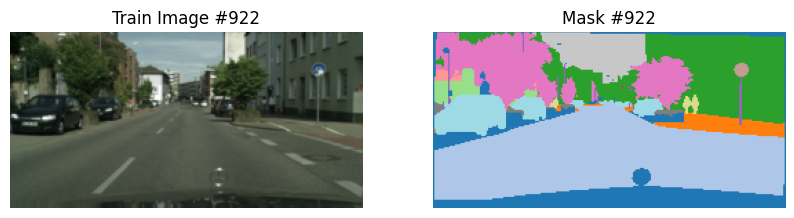

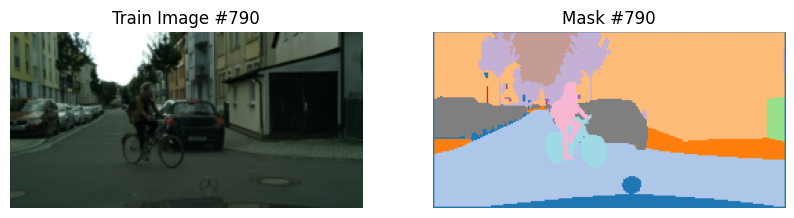

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

num_samples = 2

for _ in range(num_samples):
    idx = random.randint(0, len(train_images)-1)
    img = train_images[idx]
    mask = train_labels[idx]

    # Normalize image for display
    img_disp = img - np.min(img)
    img_disp = img_disp / np.max(img_disp)
    img_disp = (img_disp * 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_disp)
    plt.title(f"Train Image #{idx}")
    plt.axis("off")

    # Show corresponding mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='tab20')
    plt.title(f"Mask #{idx}")
    plt.axis("off")

    plt.show()


### Image and Mask Shapes

In [4]:
# Check shapes of all images and masks
image_shapes = [img.shape for img in train_images]
mask_shapes = [mask.shape for mask in train_labels]

print("Unique image shapes:", set(image_shapes))
print("Unique mask shapes:", set(mask_shapes))
print("Total images:", len(train_images))
print("Total masks:", len(train_labels))

Unique image shapes: {(128, 256, 3)}
Unique mask shapes: {(128, 256)}
Total images: 2975
Total masks: 2975


### Analyze Unique Classes in Masks

In [5]:
# Find all unique classes across all masks
all_classes = set()
for mask in train_labels:
    all_classes.update(np.unique(mask))
print("All unique classes in training masks:", sorted(all_classes))

All unique classes in training masks: [np.float64(-1.0), np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0)]


### # Find all unique classes across all masks

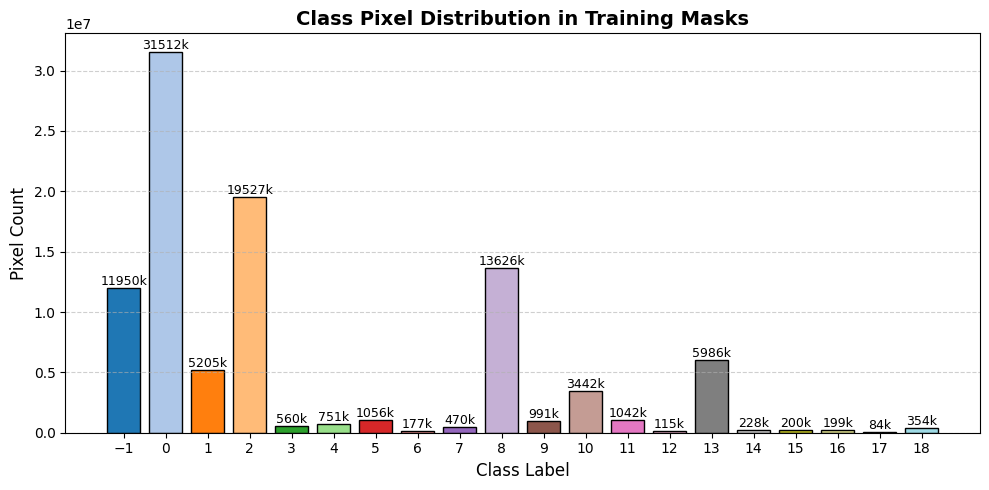

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Count pixel frequency for each class in all masks
class_counter = Counter()
for mask in train_labels:
    vals, counts = np.unique(mask, return_counts=True)
    class_counter.update(dict(zip(vals, counts)))

# Prepare data
classes = sorted(class_counter.keys())
counts = [class_counter[c] for c in classes]

# Color palette (one color per class)
colors = plt.cm.tab20(np.linspace(0, 1, len(classes)))

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(classes, counts, color=colors, edgecolor='black')

# Add labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{count//1000}k", ha='center', va='bottom', fontsize=9)

# Styling
plt.title("Class Pixel Distribution in Training Masks", fontsize=14, weight='bold')
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Pixel Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(classes)
plt.tight_layout()
plt.show()


### Check Pixel Value Distribution in Images

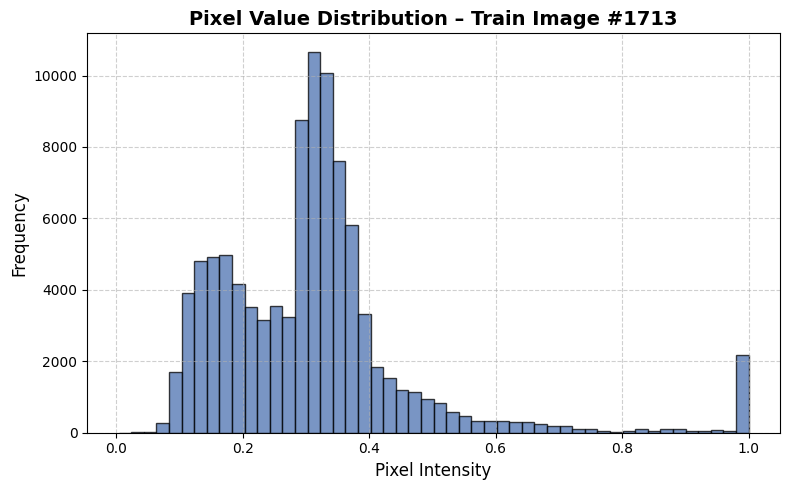

In [11]:
# Random image index
idx = np.random.randint(len(train_images))
img = train_images[idx]

# Flatten pixel values
pixels = img.flatten()

# Plot
plt.figure(figsize=(8, 5))
plt.hist(pixels, bins=50, color='#4C72B0', edgecolor='black', alpha=0.75)
plt.title(f"Pixel Value Distribution – Train Image #{idx}", fontsize=14, weight='bold')
plt.xlabel("Pixel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
